# What are the most frequent words in Donald Trump speeches and how often do they occur?

In this notebook, we'll work on a text data from 'https://data.world/data-society/major-speeches-by-donald-trump'. 
We'll analyze the distribution of words in Donald Trump speeches using the Natural Language ToolKit (nltk).

The techniques we'll use in this notebook can be used to visualize the word frequency distributions of wide plethora of texts. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and the vast proportion of this unstructured data is text data.

# Getting the tools

In [33]:
# importing modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Loading text data

In [34]:
speech=open(r'Downloads/full_speech.txt','r+').read()

Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use nltk – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove unwonted characters,such as spaces and then split the text into a list of words.

In [35]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|.')

# Tokenizing the text
tokens = tokenizer.tokenize(speech)

# Identify proper nouns in the text

The text contains a lot of words like USA or Hillary - these are called proper nouns.
We don't want to include them in our analysis, since we are focused on what a politician is saying,
and not on what entities he mentions.
Hence, we will remove those proper nouns from the text.

If a word is not a beginning of a sentence and yet it is capitalized then most likely it is a proper noun.
So we will check if the capitalized word is preceded by a dot and if it is not, then it is a proper noun.

In [36]:
# getting the list of peoples and places (proper nouns) mentioned in the speech
persons_things=[]

for t in tokens:
    if (tokens[(tokens.index(t)-1)]!='.') & ((t.capitalize()==t) | (t.isupper())):
        persons_things.append(t)

# Remove proper nouns from the speech text

In [37]:
# removing names of peoples and places from the text
tok=[tk for tk in tokens if tk not in persons_things]

# Make all words lowercase

We don't want to count words like 'Deal' and 'deal' separately, as those are the same words, so we will make all words lowercase.

In [38]:
# making all words lowercase
toklow=[x.lower() for x in tok]

# Load in stop words

It is best to remove words like 'the', 'of' and 'a' because they're not very interesting. Such words are known as stop words. The package nltk provides a list of stop words in English that we can make use of here.

In [39]:
# getting list of english stopwords,that is,words like am,you etc.
stopwords=stopwords.words('english')

# Remove stop words

In [40]:
# removing stopwords
toklow_ns=[to for to in toklow if to not in stopwords]

# Remove dots

After we removed proper nouns,we want to exclude dots as they shouldn't be counted as words.

In [41]:
toklow_ns_nd=[tn for tn in toklow_ns if tn!='.']

# Bringing the words to their base form - lemmatization

We don't want to count the words like 'was' and 'be' as different words.
To address this problem we will use so called lemmatization - this will cause, for instance,that a word 'was' 
will be brought back to its base form 'be'.

In [42]:
# To lemmatize correctly, we need to find out which words are noun, which verbs etc.
# Clasifying words and saving each word and its respective
# part of speach into words_and_its_part_of_speech
words_and_its_part_of_speech=nltk.pos_tag(toklow_ns_nd)

# saving words together with their location
words_loc=[(word_loc,length) for word_loc,length in zip(
    words_and_its_part_of_speech,list(range(len(words_and_its_part_of_speech)))
)]

# lemmatizing nouns,verbs and adjectives and storing them to
# separate lists, together with their locations

words_loc_noun=[]
words_loc_verb=[]
words_loc_adjective=[]



for pair_of_pairs,length in zip(words_loc,list(range(len(toklow)))):
    if ((pair_of_pairs[0][1]=='NN') | (pair_of_pairs[0][1]=='NNS')\
        | (pair_of_pairs[0][1]=='NNP') |(pair_of_pairs[0][1]=='NNPS')):
        
        words_loc_noun.append((nltk.stem.WordNetLemmatizer()\
                            .lemmatize(pair_of_pairs[0][0],pos='n'),length))
    
    elif ((pair_of_pairs[0][1]=='VB') | (pair_of_pairs[0][1]=='VBN')\
          | (pair_of_pairs[0][1]=='VBG')|(pair_of_pairs[0][1]=='VBD')| \
          (pair_of_pairs[0][1]=='VBP') | (pair_of_pairs[0][1]=='VBZ')):
        
        words_loc_verb.append((nltk.stem.WordNetLemmatizer()\
                            .lemmatize(pair_of_pairs[0][0],pos='v'),length))
        
    elif ((pair_of_pairs[0][1]=='JJ') | (pair_of_pairs[0][1]=='JJR')\
          | (pair_of_pairs[0][1]=='JJS')):
        words_loc_adjective.append((nltk.stem.WordNetLemmatizer()\
                                 .lemmatize(pair_of_pairs[0][0],pos='a'),length))
        

# putting all lemmatized words together
lemmatized=words_loc_noun+words_loc_verb+words_loc_adjective

# Putting the words back in the original order after lemmatization

The order of words may be important for other applications, for example for analyzing
how the frequency of the words used varies with time.

In [43]:
# sorting lemmatized words by their position in the text
lemmatized_sorted=sorted(lemmatized,key=lambda tup:tup[1])

# Get the words to count their frequencies later on

In [44]:
# extracting words from tuples of words and locations
lemmatized_words=[ls[0] for ls in lemmatized_sorted]

# Visualizing words frequencies

In [45]:
# converting a sorted list of lemmatized words to text
# to generate word cloud later on
text=' '.join(lemmatized_words)

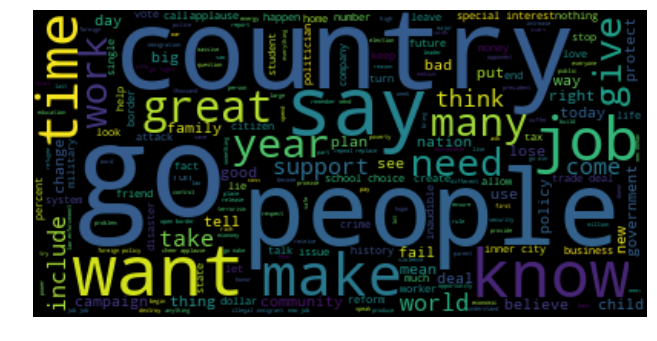

In [46]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

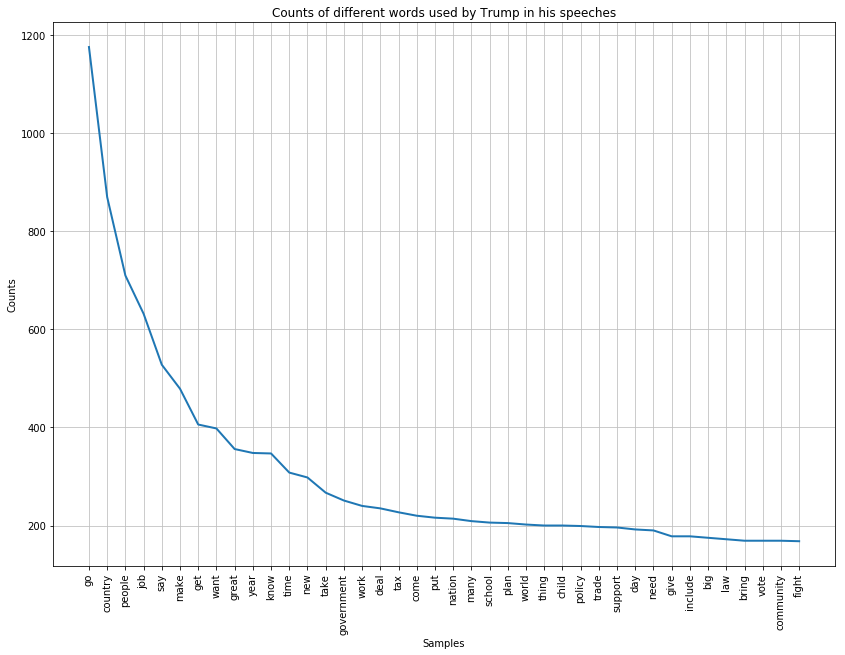

In [47]:
# Creating the word frequency distribution
freqdist = nltk.FreqDist(lemmatized_words)

# Plotting the word frequency distribution
plt.figure(figsize=(14,10))
freqdist.plot(40,title='Counts of different words used by Trump in his speeches')


plt.show()